# <p style="text-align: center;"><u>Final Project: Fake News Detection</u></p>

## <u>About This Project </u>

This project notebook will encompass the analysis of a news dataset/corpus, identification and extraction of features from that dataset, an implementation of ML classifier(s) to classify news as "fake" or "real", and finally evaluation of the chosen classifiers using appropriate evaluation metrics. Things will be further explained as this task is worked through.

To start off, a prototype that consists of a basic data processing pipeline and a very basic classifier/model will be designed and implemented. The data processing will consist of loading the data into the notebook, getting rid of entries that are empty/NULL, removing of stop words and finally extracting features using a count vectorizer. The classifier that will be used is a basic multionmial Naive Bayes classifier. This prototype will help in getting a basic grasp of the problem space and can be used as a baseline for the evaluation of subsequent models/classifiers.

## <u> Dataset Exploration and Processing </u>

The dataset that will be used in this project is the 2016 BuzzFeed dataset. This dataset contains XMl files for each news article and a CSV file that contains the overview of these articles. These XML files have properties of the news articles. 

Of interest, the properties in the XML files include:

1. The title of the news article
2. The author of the news article
2. The text/body of the news article

The CSV overview file inclues:
1. The portal/agency that published the news article
2. The veracity of the news article
3. The URL of the news article

For the prototype, only the title, body and veracity of the news articles will be looked at. Other things might be looked at further on in this project. Some preprocessing to get this dataset into a usable form will now be explained and carried out.

First, the needed libraries will be imported and the XML files will be parsed loaded into the notebook.

In [197]:
#import XML library to parse XML files
import xml.etree.ElementTree as ET
#create needed variables
article_texts = []
article_veracities = []
article_titles = []
#import os library to read files
import os
#assign to a variable the directory the XML files are in
directory_in_str = "Datasets/BuzzFeed2016/articles/"
directory_in_bytes = os.fsencode("Datasets/BuzzFeed2016/articles/")
#iterate through XML files
for file in os.listdir(directory_in_bytes):
    file_name = os.fsdecode(file)
    if file_name.endswith(".xml"):
        full_file_name = directory_in_str + file_name
        #parse XML file and append needed data to lists
        tree = ET.parse(full_file_name)
        root = tree.getroot()
        article_text = root.find("mainText")
        article_title = root.find("title")
        article_veracity = root.find("veracity")
        article_texts.append(article_text.text)
        article_veracities.append(article_veracity.text)
        article_titles.append(article_title.text)

Now, a representation of the one of the data samples loaded into the notebook is presented below.

In [198]:
#article title
print(article_titles[0])

The Impact of Debates? It's Debatable


In [199]:
#article text
print(article_texts[0])

With the Hillary Clinton-Donald Trump debates upon us, the quadrennial question comes begging: Do these showdowns matter? The chances for impact seem ripe this year. The two most unpopular major-party candidates in the history of ABC News/Washington Post polls are facing off. Donald Trump's unorthodox campaign style and provocative positions have piqued public interest; the debates may be the single best opportunity for him to allay concerns about his qualifications, temperament and policy promises alike. Hillary Clinton, for her part, needs -– like Trump -– to ease questions about her trustworthiness, as well as to spark greater enthusiasm among her supporters. Can either candidate move the needle? It will be tough: A review of data since 1960 suggests that past debates have almost never directly and measurably changed the candidates' relative standings. That's admittedly a high standard, though, and at least some debates may have had more subtle impacts. Debates have been held in 11 

In [200]:
#article veracity
print(article_veracities[0])

mostly true


Now, this data will be loaded into a pandas dataframe for easier processing and representation.

In [201]:
#import pandas to create dataframes
import pandas as pd
article_details_df = pd.DataFrame({"title": article_titles, "veracity": article_veracities, "text": article_texts})

Now a representation of the created dataframe is presented below.

In [202]:
article_details_df

,title,veracity,text
0,The Impact of Debates? It's Debatable,mostly true,With the Hillary Clinton-Donald Trump debates ...
1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,mostly true,As police today captured the man wanted for qu...
2,Donald Trump Repeats Calls for Police Profilin...,mostly true,One day after explosive devices were discovere...
3,"NY, NJ Bombings Suspect Charged With Attempted...",mostly true,"Ahmad Khan Rahami, earlier named a person of i..."
4,Trump Surrogates Push Narrative That Clinton S...,mostly true,Donald Trump's surrogates and leading supporte...
...,...,...,...
1622,The Houston shooter was dressed up as a WWII-e...,mostly true,The shooter responsible for injuring nine peop...
1623,Donald Trump totally did say global warming is...,mostly true,"On the topic of climate change, Hillary Clinto..."
1624,CNN Poll Shows Hillary Clinton Clobbers Donald...,mostly true,A poll of voters nationwide and focus groups i...
1625,Cops Who Killed Freddie Gray Honored and Prais...,mostly true,Three of the Baltimore police officers previou...


Now, NA values are checked for in the dataframe.

In [203]:
article_details_df.isna().sum()

title       31
veracity     0
text        23
dtype: int64

The rows that contain text values of NA in the "title" or "text" columns will now be discarded.

In [205]:
#drop NA values
article_details_df = article_details_df.dropna(subset = ["title", "text"]).reset_index(drop = True)

In [206]:
article_details_df

,title,veracity,text
0,The Impact of Debates? It's Debatable,mostly true,With the Hillary Clinton-Donald Trump debates ...
1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,mostly true,As police today captured the man wanted for qu...
2,Donald Trump Repeats Calls for Police Profilin...,mostly true,One day after explosive devices were discovere...
3,"NY, NJ Bombings Suspect Charged With Attempted...",mostly true,"Ahmad Khan Rahami, earlier named a person of i..."
4,Trump Surrogates Push Narrative That Clinton S...,mostly true,Donald Trump's surrogates and leading supporte...
...,...,...,...
1585,The Houston shooter was dressed up as a WWII-e...,mostly true,The shooter responsible for injuring nine peop...
1586,Donald Trump totally did say global warming is...,mostly true,"On the topic of climate change, Hillary Clinto..."
1587,CNN Poll Shows Hillary Clinton Clobbers Donald...,mostly true,A poll of voters nationwide and focus groups i...
1588,Cops Who Killed Freddie Gray Honored and Prais...,mostly true,Three of the Baltimore police officers previou...


As seen above, the dataframe now has 1590 entries, compared to the 1627 entries it had before rows containing NA were dropped.

Now, using the NLTK library, stopwords in the titles/texts will be removed. Then, the needed feature matrix (with stopwords removed) and target vector will be stored in a new dataset.

In [13]:
#create a new dataframe
article_details_df_processed = pd.DataFrame()
#import library containing needed stopwords
from nltk.corpus import stopwords
stopWords = stopwords.words("english") 
article_details_df_processed["title"] = article_details_df["title"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
article_details_df_processed["text"] = article_details_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
article_details_df_processed["label"] = article_details_df["veracity"]

Before coding out any implementation that requires the use of the sklearn libray, sklearn is patched with an Intel specific driver that enables multi-threading, making fitting any model exponentially faster. The code below represents that.

In [14]:
#import
from sklearnex import patch_sklearn 
#patch
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Now, the newly created dataframe will be used to create the feature matrix X and target vector y

In [15]:
#using the text in the article as the feature matrix and the label as the target vector
prototype_X = article_details_df_processed.title + " " + article_details_df_processed.text
prototype_y = article_details_df_processed.label

A representation of the feature matrix X and target vector y is presented below.

In [16]:
#feature matrix X
prototype_X

0       The Impact Debates? It's Debatable With Hillar...
1       Details Emerge About NYC Bomb Suspect Ahmad Kh...
2       Donald Trump Repeats Calls Police Profiling Af...
3       NY, NJ Bombings Suspect Charged With Attempted...
4       Trump Surrogates Push Narrative That Clinton S...
                              ...                        
1585    The Houston shooter dressed WWII-era Nazi morn...
1586    Donald Trump totally say global warming Chines...
1587    CNN Poll Shows Hillary Clinton Clobbers Donald...
1588    Cops Who Killed Freddie Gray Honored Praised H...
1589    Fans said I ‘should hung anthem’: Emotional co...
Length: 1590, dtype: object

In [17]:
#target vector
prototype_y

0       mostly true
1       mostly true
2       mostly true
3       mostly true
4       mostly true
           ...     
1585    mostly true
1586    mostly true
1587    mostly true
1588    mostly true
1589    mostly true
Name: label, Length: 1590, dtype: object

Now, the feature matrix and target vector are shuffled and split into training and testing sets using a module (train_test_split) from the sklearn library.

In [18]:
#import needed module
from sklearn.model_selection import train_test_split
#reserving 20% of the dataset as unseen test data
prototype_X_train, prototype_X_test, prototype_y_train, prototype_y_test = train_test_split(prototype_X, prototype_y, test_size = 0.2, random_state = 42)

## <u> First Prototype Development </u>

### Building, Training and Testing the Model

Now that the dataset has been explored and processed, it is time to start developing the prototype.

First, a model will be built. This will be done by building a pipeline using the featurizer (CountVectorizer) and the model (MultinomialNB). Needed modules will also be imported.

In [19]:
#import needed modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

prototype_model = make_pipeline(CountVectorizer(), MultinomialNB())

Subsequently, the model is fit the training data.

In [20]:
#fit model to data
prototype_model.fit(prototype_X_train, prototype_y_train);

Finally, predictions are made on the test set and scored using a relevant library. The F1-score is also calculated and displayed.

In [21]:
#make predictions and compare to known correct test target vector
prototype_test_preds = prototype_model.predict(prototype_X_test)

### Evaluating the Model

In [22]:
#calculate f1 score
from sklearn import metrics

print("Accuracy: " + str(metrics.accuracy_score(prototype_y_test, prototype_test_preds)))
print("Macro precision: " + str(metrics.precision_score(prototype_y_test, prototype_test_preds, average = "macro", zero_division = 1)))
print("Macro recall: " + str(metrics.recall_score(prototype_y_test, prototype_test_preds, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(prototype_y_test, prototype_test_preds, average = "macro")))


Accuracy: 0.8144654088050315
Macro precision: 0.8397065897065896
Macro recall: 0.3109375
Macro F1-Score: 0.31439539916402337


As seen from the above performance metrics, although the model has good precision, it severely lacks in recall. The prediction results will now also be displayed using a confusion matrix. A function will be created to increase code reusability.

In [23]:
#import needed libs
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classes = prototype_model.classes_

In [167]:
#function to display confusion matrix
def draw_conf_matrix(actuals, preds, _classes, _labels, title):
    confusionMatrix = confusion_matrix(actuals, preds, labels = [_class for _class in _classes])
    sns.heatmap(confusionMatrix.T, square = True, annot = True, fmt='1', cbar = False,
        xticklabels = [_label for _label in _labels], yticklabels = [_label for _label in _labels])
    plt.title(title)
    _ = plt.xlabel('True Label')
    _ = plt.ylabel('Predicted Label');

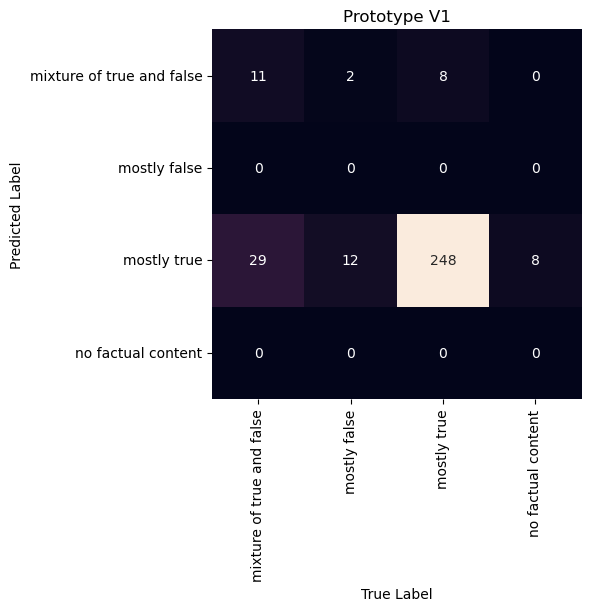

In [168]:
draw_conf_matrix(prototype_y_test, prototype_test_preds, classes, classes, "Prototype V1")

Although accuracy, precision, recall and F1-score are good measures of a model's performance, the way they were calculated above was through a single run of model fitting and predictions on one hold out dataset. This might lead to somewhat biased results in case the model is able to generate accurate predictions on the hold out dataset but not the whole dataset. To combat this possible bias in evaluating the model's performance, 10 iterations of cross-validation is a route that can be taken. This will now be done below. Additionally, this iterative cross-validation will be encapsulated in a function to make re-used easier.

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
import numpy as np
def k_fold_cross_val(_model, _X, _y, _folds, _iterations):  
    metric_details = []
    accuracy_avg = 0.0
    precision_avg = 0.0
    recall_avg = 0.0
    f1_avg = 0.0
    for i in range(_iterations):
        X_shuffled, y_shuffled = shuffle(_X, _y, random_state = i)
        cv_scores = cross_validate(_model, X_shuffled, y_shuffled, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], n_jobs = -1, cv = 5)
        metric_details.append([cv_scores["test_accuracy"], cv_scores["test_precision_macro"], cv_scores["test_recall_macro"], cv_scores["test_f1_macro"]]) 
    return (metric_details)

In [27]:
def calculate_average_scores(metric_details):
    overall_avg_acc = 0.0
    overall_avg_prec = 0.0
    overall_avg_recall = 0.0
    overall_avg_f1 = 0.0
    total_metrics = len(metric_details) * len(metric_details[0][0])
    for metrics in metric_details:
        overall_avg_acc += np.sum(metrics[0])
        overall_avg_prec += np.sum(metrics[1])  
        overall_avg_recall += np.sum(metrics[2])
        overall_avg_f1 += np.sum(metrics[3])
    overall_avg_acc /= total_metrics
    overall_avg_prec /= total_metrics
    overall_avg_recall /= total_metrics
    overall_avg_f1 /= total_metrics
    
    print("Average accuracy: " + str(overall_avg_acc))
    print("Average macro precision: " + str(overall_avg_prec))
    print("Average macro recall: " + str(overall_avg_recall))
    print("Average macro F1-score: " + str(overall_avg_f1))
    
    return ([overall_avg_acc, overall_avg_prec, overall_avg_recall, overall_avg_f1])

Now, this function will be called with the needed parameters.

In [28]:
prototype_model_cv_scores = k_fold_cross_val(prototype_model, prototype_X, prototype_y, 5, 10)

In [29]:
prototype_model_cv_average = calculate_average_scores(prototype_model_cv_scores)

Average accuracy: 0.780817610062893
Average macro precision: 0.5989016879849466
Average macro recall: 0.32558982139901377
Average macro F1-score: 0.347971455396896


As seen from the above results, average accuracy, macro precision, recall and F1-scores differ from the results calculated with just one iteration and fold of training/testing. The average results calculated represent more reliable metrics.

## <u> Revisiting the Class Labels </u>

Taking a look at the classes/labels present in the dataset, it is observed that there are some modifications needed. The classes, for the sake of remembrance are presented below.

In [30]:
values, counts = np.unique(prototype_y, return_counts = True)
for i in range(len(values)):
    print(values[i] + ": " + str(counts[i]))

mixture of true and false: 204
mostly false: 80
mostly true: 1243
no factual content: 63


From the printed information above, it can be seen that there are four classes represented. Taking a closer look at these classes, it is noticed that one class, "no factual content" is actually news that is opinion based. It would thus most likely not be classifiable as fake or real news and so should be excluded from being fed into the model.

Another class, the "mixture of true and false" class, can be construed as intentionally being misleading in nature by trying to exude trustworthiness by including some factual content but then using that established trustworthiness to push other false narratives. Thus it would make sense to combine news articles from the "mostly false" and "mixture of true and false" classes into one class "fake news" (labeled 0). The "mostly true" class label can then be changed to "true news"(labeled 1). 

In [31]:
#turn off warning for chained assignments
pd.options.mode.chained_assignment = None  
#discard rows where veracity is "no factual content"
article_details_df_processed2 = article_details_df_processed[article_details_df_processed.label != "no factual content"].dropna().reset_index(drop = True)
article_details_df_processed2.loc[article_details_df_processed2["label"] == "mostly true", "label"] = int(1)
article_details_df_processed2.loc[(article_details_df_processed2["label"] == "mixture of true and false") | (article_details_df_processed2["label"] == "mostly false"), "label"] = int(0)

The new labels for the class are displayed below.

In [32]:
article_details_df_processed2["label"].value_counts()

1    1243
0     284
Name: label, dtype: int64

## <u> Second Prototype Development </u>

Now that the needed classes have been modified, the same methodology to split the dataset and feed it into the model that was used before will be followed.

In [33]:
#using the text in the article as the feature matrix and the label as the target vector
prototype_X2 = article_details_df_processed2.title + " " + article_details_df_processed2.text
prototype_y2 = article_details_df_processed2.label.astype("int")
#reserving 20% of the dataset as unseen test data
prototype_X_train2, prototype_X_test2, prototype_y_train2, prototype_y_test2 = train_test_split(prototype_X2, prototype_y2, test_size = 0.2, random_state = 42)

### Building, Training and Testing the Model

Now, a new model/pipeline will be built and fit to the feature matrix.

In [34]:
#build a new pipeline
prototype_model2 = make_pipeline(CountVectorizer(), MultinomialNB())
#fit model to data
prototype_model2.fit(prototype_X_train2, prototype_y_train2);

Now, predictions are made and various metrics are calculated.

In [35]:
#make predictions and compare to known correct test target vector
prototype_test_preds2 = prototype_model2.predict(prototype_X_test2)

### Evaluating the Model

In [36]:
#calculate metrics
print("Accuracy: " + str(metrics.accuracy_score(prototype_y_test2, prototype_test_preds2)))
print("Precision: " + str(metrics.precision_score(prototype_y_test2, prototype_test_preds2, average = "macro", zero_division = 1)))
print("Recall: " + str(metrics.recall_score(prototype_y_test2, prototype_test_preds2, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(prototype_y_test2, prototype_test_preds2, average = "macro")))

Accuracy: 0.8627450980392157
Precision: 0.7657407407407407
Recall: 0.6955632949727437
Macro F1-Score: 0.7212873004857738


As compared to the scores obtained with the first model, it is seen that these scores are a lot better. This is because of the modification done to the labels/classes in the dataset. Now, like before, a confusion matrix will for these predictions will be presented below.

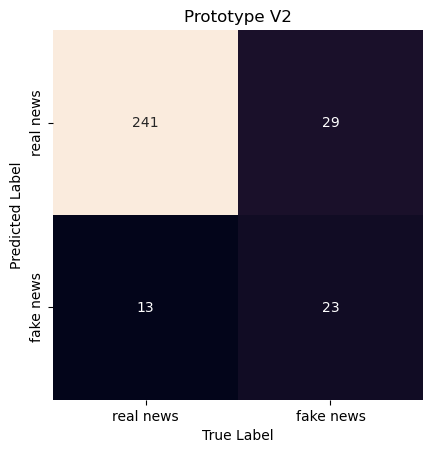

In [169]:
#draw confusion matrix
draw_conf_matrix(prototype_y_test2, prototype_test_preds2, [1, 0], ["real news", "fake news"], "Prototype V2")

Now, a function to plot the ROC curve for the cross-validation results will be defined and used. This is done so this function can be used again later.

In [38]:
#import needed libraries
import matplotlib.pyplot as plt

In [180]:
def plot_ROC_cross_val(X, y, model, _title):

    from sklearn.metrics import auc
    from sklearn.metrics import RocCurveDisplay
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(n_splits=5)
    classifier = model

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            prototype_X2[test],
            prototype_y2[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=_title + f"\nMean ROC curve with variability\n(Positive label '1')",
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()

The function defined above will now be called with the needed parameters.

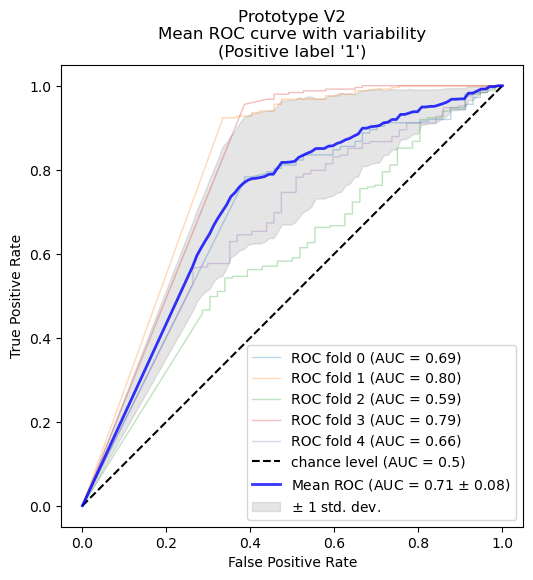

In [181]:
plot_ROC_cross_val(prototype_X2, prototype_y2, prototype_model2, "Prototype V2")

Although there was a pretty substantial improvement in the model's predictions after modifying the classes, the values presented above are again derived only from a single run of fitting/predicting. As done before, it would be best to do iterative cross-validation using this newly built model. The function created before will now be used to do this. This function will also display the metrics/results needed.

In [41]:
#cross validation with needed results displayed
prototype_model2_cv_scores = k_fold_cross_val(prototype_model2, prototype_X2, prototype_y2, 5, 10)

In [42]:
prototype_model2_cv_average = calculate_average_scores(prototype_model2_cv_scores)

Average accuracy: 0.8036757741347905
Average macro precision: 0.6612739759390752
Average macro recall: 0.6236825436599659
Average macro F1-score: 0.6354623992702031


## <u> Comparing the Two Prototype Models </u>

The performance metric scores (displayed above) obtained from cross validation are a better indication of the actual performance of the model compared to the performance metric scores previously obtained from just one iteration of training/test. Also, to note is the quite marked increase in performance of the second model when compared to the first model. The cross-validation performance metric scores of the two prototype models explored will be added to a dataframe and displayed below to make comparison easier.


In [43]:
#create dataframe to store performance metrics
model_metrics_comparison = pd.DataFrame(columns = ["model name", "accuracy", "macro precision", "macro recall", "macro F1"])

In [44]:
#add performance metrics for prototype models
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["prototype model V1", prototype_model_cv_average[0], prototype_model_cv_average[1], prototype_model_cv_average[2], prototype_model_cv_average[3]]
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["prototype model V2", prototype_model2_cv_average[0], prototype_model2_cv_average[1], prototype_model2_cv_average[2], prototype_model2_cv_average[3]]

In [45]:
model_metrics_comparison

,model name,accuracy,macro precision,macro recall,macro F1
0,prototype model V1,0.780818,0.598902,0.325590,0.347971
1,prototype model V2,0.803676,0.661274,0.623683,0.635462


As seen in the above dataframe, prototype model V2 has better performance across the board when compared to prototype model V1. This dataframe will be periodically added to when new models are built, trained and tested. 

Now that the prototype to compare against has been developed, different combinations of features, feature extraction methods and models will be tested.

## <u> Going Beyond the Prototype </u>


## Using TF-ID feature extractor With Multinomial Naive Bayes classifier

The first variation that will be explored is changing up the feature extractor. Instead of a count vectorizer, a term frequency-inverse document (TF-ID) vectorizer will be used. Unlike a count vectorizer which simply counts the number of times words appear, a TF-ID vectorizer counts the number of times words appear but also normalizes this count. This *should* helps weight terms more accurately.  

To start off, the previously processed dataset will be used. This is the dataset which is split into a feature matrix consisting of the words in the title of the articles + the body of the articles and the target vector of 0s and 1s, representing fake and real news respectively. A copy of this processed dataset will be made. The copy of the dataset will then be split into a training and testing sets.

In [46]:
#copy
tfid_X = prototype_X2
tfid_y = prototype_y2

#reserving 20% of the dataset as unseen test data
tfid_X_train, tfid_X_test, tfid_y_train, tfid_y_test = train_test_split(tfid_X, tfid_y, test_size = 0.2, random_state = 42)

### Using GridSearchCV to Get Best Parameters

Now, a model will be created, trained and tested. Instead of what was done before where hyperparameters were not experimented with, grid search will be used to find the best suitable hyperparameters for the given classifier.

To start off, a multinomial naive bayes classifier will be used.

In [60]:
#import feature extractor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#build a pipeline

pipeline = Pipeline([
    ("feature_extractor", TfidfVectorizer()),
    ("estimator", MultinomialNB())])

pipeline_params = [
    {"feature_extractor__lowercase": (True, False),
     "feature_extractor__ngram_range": ([1, 1], [1, 2], [1, 3], [2, 3], [3, 3]),
     "feature_extractor__use_idf": (True, False),
     "feature_extractor__smooth_idf": (True, False),
     "feature_extractor__norm": ("l1", "l2", None),
     "feature_extractor__sublinear_tf": (True, False),
     "estimator__fit_prior": (True, False)
    }    
]
tfid_X_shuffled, tfid_y_shuffled = shuffle(tfid_X, tfid_y, random_state = 42)

grid = GridSearchCV(pipeline, pipeline_params, cv = 5,scoring = "f1_macro", n_jobs = -1)
grid.fit(tfid_X_shuffled, tfid_y_shuffled)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_extractor', TfidfVectorizer()),
                                       ('estimator', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'estimator__fit_prior': (True, False),
                          'feature_extractor__lowercase': (True, False),
                          'feature_extractor__ngram_range': ([1, 1], [1, 2],
                                                             [1, 3], [2, 3],
                                                             [3, 3]),
                          'feature_extractor__norm': ('l1', 'l2', None),
                          'feature_extractor__smooth_idf': (True, False),
                          'feature_extractor__sublinear_tf': (True, False),
                          'feature_extractor__use_idf': (True, False)}],
             scoring='f1_macro')

Now, with the best parameters from grid search are displayed.

In [61]:
grid.best_params_

{'estimator__fit_prior': True,
 'feature_extractor__lowercase': False,
 'feature_extractor__ngram_range': [1, 1],
 'feature_extractor__norm': None,
 'feature_extractor__smooth_idf': False,
 'feature_extractor__sublinear_tf': False,
 'feature_extractor__use_idf': True}

### Building, Training and Testing the Model

Using the above parameters, a pipeline will now be built. This will then be trained and tested.

In [70]:
tfid_NB_model = make_pipeline(TfidfVectorizer(lowercase = False, ngram_range = (1, 1), norm = None, sublinear_tf = False, use_idf = True, smooth_idf = False), MultinomialNB())
#fit model to data
tfid_NB_model.fit(tfid_X_train, tfid_y_train);

In [71]:
#make predictions and compare to known correct test target vector
tfid_NB_preds = tfid_NB_model.predict(tfid_X_test)

### Evaluating the Model

With the predictions made above, the model will be evaluated using the standard metrics. It is important to note that these evaluations are not final as cross-validation evaluations will be done subsequently. The evaluations presented below are just to get a basic understanding about the performance of the model and to use to create a confusion matrix.

In [65]:
#calculate metrics
print("Accuracy: " + str(metrics.accuracy_score(tfid_y_test, tfid_NB_preds)))
print("Precision: " + str(metrics.precision_score(tfid_y_test, tfid_NB_preds, average = "macro", zero_division = 1)))
print("Recall: " + str(metrics.recall_score(tfid_y_test, tfid_NB_preds, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(tfid_y_test, tfid_NB_preds, average = "macro")))

Accuracy: 0.8464052287581699
Precision: 0.7274509803921569
Recall: 0.7239551786795881
Macro F1-Score: 0.7256757014515421


The F1-score obtained seems to be very similar to the score obtained with the prototype model V2. A confusion matrix representing these results will now be displayed.

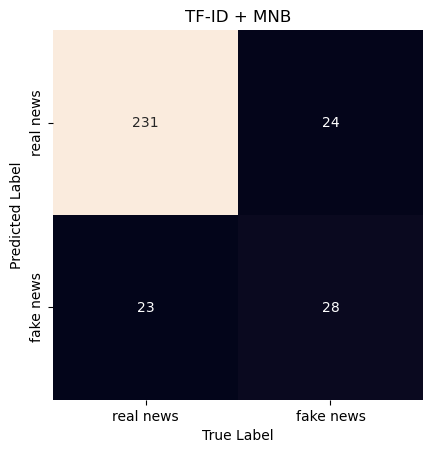

In [170]:
#draw confusion matrix
draw_conf_matrix(tfid_y_test, tfid_NB_preds, [1, 0], ["real news", "fake news"], "TF-ID + MNB")

The ROC curve of this model for 5 folds will now be plotted.

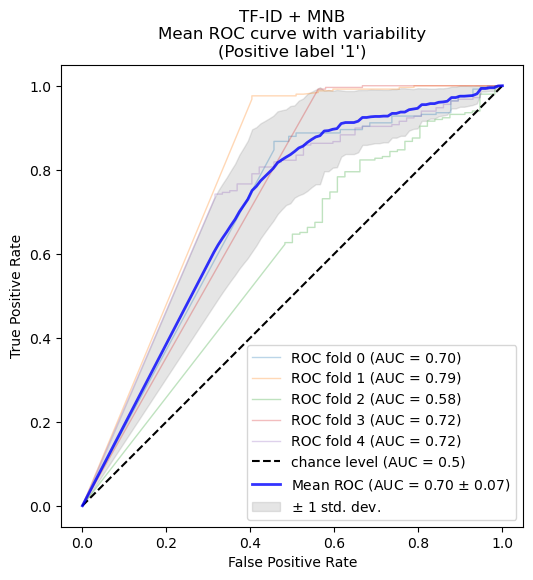

In [183]:
#plot ROC curve
plot_ROC_cross_val(tfid_X, tfid_y, tfid_NB_model, "TF-ID + MNB")

Now, cross validation will be carried out.

In [120]:
#cross validation with needed results displayed
tfid_NB_cv_scores = k_fold_cross_val(tfid_NB_model, tfid_X, tfid_y, 5, 10)
tfid_NB_cv_average = calculate_average_scores(tfid_NB_cv_scores)

Average accuracy: 0.8125745205185899
Average macro precision: 0.6944178871284025
Average macro recall: 0.7020440493480106
Average macro F1-score: 0.69714633410354


The performance of this model will now be added to the comparison dataframe created earlier.

In [159]:
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["TF-ID + MNB classifier", tfid_NB_cv_average[0], tfid_NB_cv_average[1], tfid_NB_cv_average[2], tfid_NB_cv_average[3]]

The current state of the dataframe is displayed below.

In [78]:
model_metrics_comparison

,model name,accuracy,macro precision,macro recall,macro F1
0,prototype model V1,0.780818,0.598902,0.325590,0.347971
1,prototype model V2,0.803676,0.661274,0.623683,0.635462
2,TF-ID model + MNB classifier,0.812575,0.694418,0.702044,0.697146


As seen from the above dataframe, the newest iteration of the model + classifier (TF-ID model + MNB classifier) is the most performant. This will now further tried to be improved upon by trying different classifiers. 

## TF-ID + Stochastic Gradient Descent (SGD)

Instead of using a multinomial Naive Bayes classifier, a stochastic gradient descent (SGD) classifier now be tried.

### Using GridSearchCV to Get Best Parameters

Like done previously, grid search will now be used to obtain the best parameters to be used with the SGD classifier.

In [92]:
from sklearn.linear_model import SGDClassifier
SGD_pipeline = Pipeline([
    ("feature_extractor", TfidfVectorizer()),
    ("estimator", SGDClassifier())])

SGD_pipeline_params = [
    {"feature_extractor__lowercase": (True, False),
     "feature_extractor__ngram_range": ([1, 1], [1, 2], [1, 3], [2, 3], [3, 3]),
     "feature_extractor__use_idf": (True, False),
     "feature_extractor__smooth_idf": (True, False),
     "feature_extractor__norm": ("l1", "l2", None),
     "feature_extractor__sublinear_tf": (True, False),
     "estimator__loss": ("hinge", "modified_huber"),
     "estimator__penalty": ("l2", "l1"),
     "estimator__early_stopping": ([True]),
     "estimator__class_weight": ("balanced", None),
     "estimator__warm_start": ([True]),
     "estimator__n_jobs": ([-1]),
     "estimator__n_iter_no_change": ([20])
    }
]
tfid_X_shuffled, tfid_y_shuffled = shuffle(tfid_X, tfid_y, random_state = 42)

SGD_grid = GridSearchCV(SGD_pipeline, SGD_pipeline_params, cv = 3,scoring = "f1_macro", n_jobs = -1)
SGD_grid.fit(tfid_X_shuffled, tfid_y_shuffled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_extractor', TfidfVectorizer()),
                                       ('estimator', SGDClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator__class_weight': ('balanced', None),
                          'estimator__early_stopping': [True],
                          'estimator__loss': ('hinge', 'modified_huber'),
                          'estimator__n_iter_no_change': [20],
                          'estimator__n_jobs': [-1],
                          'estimator__penalty': ('l2', 'l1'),
                          'estimator__warm_start': [True],
                          'feature_extractor__lowercase': (True, False),
                          'feature_extractor__ngram_range': ([1, 1], [1, 2],
                                                             [1, 3], [2, 3],
                                                             [3, 3]),
                          'feature_extractor__norm': ('l1',

In [94]:
SGD_grid.best_params_

{'estimator__class_weight': 'balanced',
 'estimator__early_stopping': True,
 'estimator__loss': 'hinge',
 'estimator__n_iter_no_change': 20,
 'estimator__n_jobs': -1,
 'estimator__penalty': 'l1',
 'estimator__warm_start': True,
 'feature_extractor__lowercase': True,
 'feature_extractor__ngram_range': [1, 3],
 'feature_extractor__norm': 'l2',
 'feature_extractor__smooth_idf': True,
 'feature_extractor__sublinear_tf': False,
 'feature_extractor__use_idf': True}

### Building, Training and Testing the Model

Using the above parameters, a pipeline will now be built. This will then be trained and tested.

In [115]:
tfid_SGD_model = make_pipeline(TfidfVectorizer(lowercase = True, ngram_range = (1, 3), norm = "l2", sublinear_tf = False, use_idf = True, smooth_idf = True), SGDClassifier(class_weight = "balanced", early_stopping = True, loss = "hinge", n_iter_no_change = 20, n_jobs = -1, penalty = "l1"))
#fit model to data
tfid_SGD_model.fit(tfid_X_train, tfid_y_train);

In [116]:
#make predictions and compare to known correct test target vector
tfid_SGD_pred = tfid_SGD_model.predict(tfid_X_test)

### Evaluating the Model

With the predictions made above, the model will be evaluated using the standard metrics. It is important to note that these evaluations are not final as cross-validation evaluations will be done subsequently. The evaluations presented below are just to get a basic understanding about the performance of the model and to use to create a confusion matrix.

In [117]:
#calculate metrics
print("Accuracy: " + str(metrics.accuracy_score(tfid_y_test, tfid_SGD_pred)))
print("Precision: " + str(metrics.precision_score(tfid_y_test, tfid_SGD_pred, average = "macro", zero_division = 1)))
print("Recall: " + str(metrics.recall_score(tfid_y_test, tfid_SGD_pred, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(tfid_y_test, tfid_SGD_pred, average = "macro")))

Accuracy: 0.8758169934640523
Precision: 0.7778455284552845
Recall: 0.8104936402180497
Macro F1-Score: 0.7923571428571428


This is the best F1-score obtained so far. Now a confusion matrix to represent these results will be displayed.

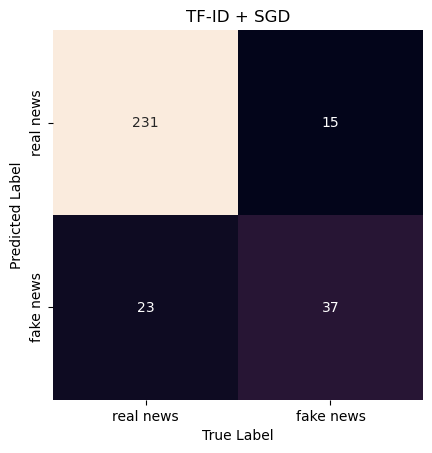

In [172]:
#draw confusion matrix
draw_conf_matrix(tfid_y_test, tfid_SGD_pred, [1, 0], ["real news", "fake news"], "TF-ID + SGD")

The ROC curve of this model for 5 folds will now be plotted.

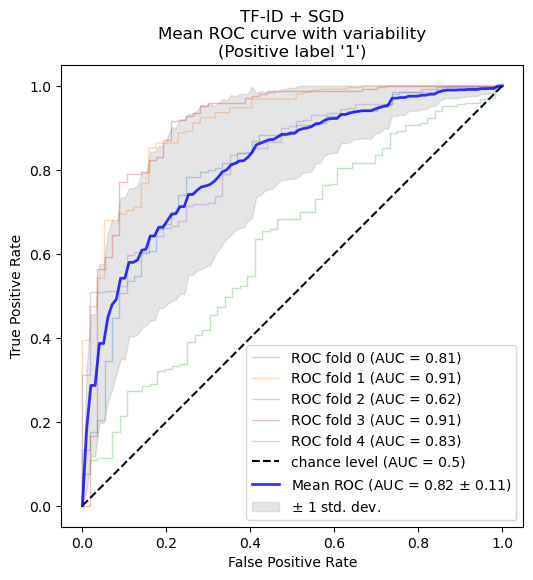

In [184]:
#plot ROC curve
plot_ROC_cross_val(tfid_X, tfid_y, tfid_SGD_model, "TF-ID + SGD")

Now, cross validation will be carried out.

In [121]:
#cross validation with needed results displayed
tfid_SGD_cv_scores = k_fold_cross_val(tfid_SGD_model, tfid_X, tfid_y, 5, 10)
tfid_SGD_cv_average = calculate_average_scores(tfid_SGD_cv_scores)

Average accuracy: 0.8186688096003429
Average macro precision: 0.7111288487277114
Average macro recall: 0.7472287963398585
Average macro F1-score: 0.7249087737592963


The performance of the model will now be added to the comparison dataframe

In [158]:
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["TF-ID + SGD classifier", tfid_SGD_cv_average[0], tfid_SGD_cv_average[1], tfid_SGD_cv_average[2], tfid_SGD_cv_average[3]]

In [123]:
model_metrics_comparison

,model name,accuracy,macro precision,macro recall,macro F1
0,prototype model V1,0.780818,0.598902,0.325590,0.347971
1,prototype model V2,0.803676,0.661274,0.623683,0.635462
2,TF-ID model + MNB classifier,0.812575,0.694418,0.702044,0.697146
3,TF-ID model + SGD classifier,0.818669,0.711129,0.747229,0.724909


## TF-ID + Random Forest Classifier

Next, a random forest classifier will be tested out.

### Using GridSearchCV to Get Best Parameters

Grid search will now be used to get the best parameters. 

In [100]:
from sklearn.ensemble import RandomForestClassifier
RF_pipeline = Pipeline([
    ("feature_extractor", TfidfVectorizer()),
    ("estimator", RandomForestClassifier())])

RF_pipeline_params = [
    {"feature_extractor__lowercase": (True, False),
     "feature_extractor__ngram_range": ([1, 1], [1, 2], [1, 3], [2, 3], [3, 3]),
     "feature_extractor__use_idf": (True, False),
     "feature_extractor__smooth_idf": (True, False),
     "feature_extractor__norm": ("l1", "l2", None),
     "feature_extractor__sublinear_tf": (True, False),
     "estimator__warm_start": ([True]),
     "estimator__n_jobs": ([-1]),
     "estimator__n_estimators": ([200]),
     
    }
]
tfid_X_shuffled, tfid_y_shuffled = shuffle(tfid_X, tfid_y, random_state = 42)

RF_grid = GridSearchCV(RF_pipeline, RF_pipeline_params, cv = 3,scoring = "f1_macro", n_jobs = -1)
RF_grid.fit(tfid_X_shuffled, tfid_y_shuffled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_extractor', TfidfVectorizer()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator__n_estimators': [200],
                          'estimator__n_jobs': [-1],
                          'estimator__warm_start': [True],
                          'feature_extractor__lowercase': (True, False),
                          'feature_extractor__ngram_range': ([1, 1], [1, 2],
                                                             [1, 3], [2, 3],
                                                             [3, 3]),
                          'feature_extractor__norm': ('l1', 'l2', None),
                          'feature_extractor__smooth_idf': (True, False),
                          'feature_extractor__sublinear_tf': (True, False),
                          'feature_extractor__use_idf': (True,

In [124]:
RF_grid.best_params_

{'estimator__n_estimators': 200,
 'estimator__n_jobs': -1,
 'estimator__warm_start': True,
 'feature_extractor__lowercase': True,
 'feature_extractor__ngram_range': [1, 3],
 'feature_extractor__norm': 'l2',
 'feature_extractor__smooth_idf': True,
 'feature_extractor__sublinear_tf': True,
 'feature_extractor__use_idf': True}

### Building, Training and Testing the Model

Using the above parameters, a pipeline will now be built. This will then be trained and tested.

In [142]:
tfid_RF_model = make_pipeline(TfidfVectorizer(lowercase = True, ngram_range = (1, 3), norm = "l2", sublinear_tf = True, use_idf = True, smooth_idf = True), RandomForestClassifier(n_jobs = -1, n_estimators = 200))
#fit model to data
tfid_RF_model.fit(tfid_X_train, tfid_y_train);

In [143]:
#make predictions and compare to known correct test target vector
tfid_RF_pred = tfid_RF_model.predict(tfid_X_test)

### Evaluating the Model

With the predictions made above, the model will be evaluated using the standard metrics. It is important to note that these evaluations are not final as cross-validation evaluations will be done subsequently. The evaluations presented below are just to get a basic understanding about the performance of the model and to use to create a confusion matrix.

In [144]:
#calculate metrics
print("Accuracy: " + str(metrics.accuracy_score(tfid_y_test, tfid_RF_pred)))
print("Precision: " + str(metrics.precision_score(tfid_y_test, tfid_RF_pred, average = "macro", zero_division = 1)))
print("Recall: " + str(metrics.recall_score(tfid_y_test, tfid_RF_pred, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(tfid_y_test, tfid_RF_pred, average = "macro")))

Accuracy: 0.8431372549019608
Precision: 0.9205298013245033
Recall: 0.5384615384615384
Macro F1-Score: 0.528263103802672


The obtained F1-score does not look great. A confusion matrix representing the scores will now be displayed

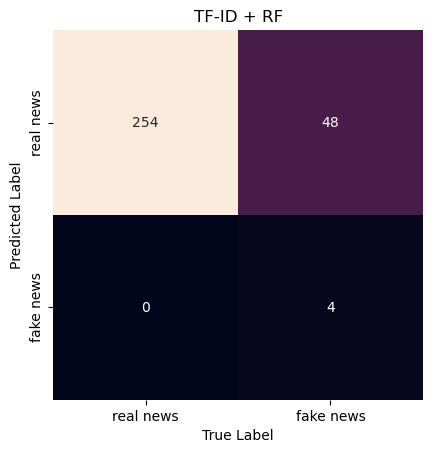

In [173]:
#draw confusion matrix
draw_conf_matrix(tfid_y_test, tfid_RF_pred, [1, 0], ["real news", "fake news"], "TF-ID + RF")

The ROC curve of this model for 5 folds will now be plotted.

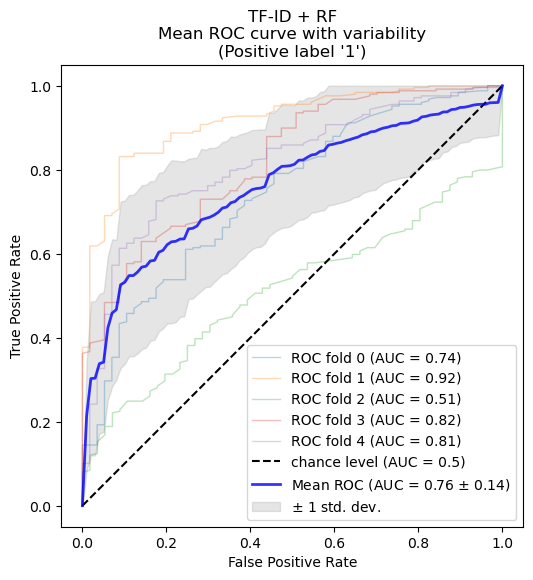

In [185]:
#plot ROC curve
plot_ROC_cross_val(tfid_X, tfid_y, tfid_RF_model, "TF-ID + RF")

Now cross validation will be carried out.

In [136]:
#cross validation with needed results displayed
tfid_RF_cv_scores = k_fold_cross_val(tfid_RF_model, tfid_X, tfid_y, 5, 10)
tfid_RF_cv_average = calculate_average_scores(tfid_RF_cv_scores)

Average accuracy: 0.8184030858244937
Average macro precision: 0.821350194246111
Average macro recall: 0.5147945091060336
Average macro F1-score: 0.47955246858866496


The performance of the model will now be added to the comparison dataframe

In [157]:
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["TF-ID + Random Forest classifier", tfid_RF_cv_average[0], tfid_RF_cv_average[1], tfid_RF_cv_average[2], tfid_RF_cv_average[3]]

In [138]:
model_metrics_comparison

,model name,accuracy,macro precision,macro recall,macro F1
0,prototype model V1,0.780818,0.598902,0.325590,0.347971
1,prototype model V2,0.803676,0.661274,0.623683,0.635462
2,TF-ID model + MNB classifier,0.812575,0.694418,0.702044,0.697146
3,TF-ID model + SGD classifier,0.818669,0.711129,0.747229,0.724909
4,TF-ID model + Random Forest classifier,0.818403,0.821350,0.514795,0.479552


## TF-ID + K Nearest Neighbours Classifier (KNN)

The final classifier that will be tested is the KNN classifier. 

### Using GridSearchCV to Get Best Parameters

Grid search will now be used to get the best parameters. 

In [103]:
from sklearn.neighbors import KNeighborsClassifier
KN_pipeline = Pipeline([
    ("feature_extractor", TfidfVectorizer()),
    ("estimator", KNeighborsClassifier())])

KN_pipeline_params = [
    {"feature_extractor__lowercase": (True, False),
     "feature_extractor__ngram_range": ([1, 1], [1, 2], [1, 3], [2, 3], [3, 3]),
     "feature_extractor__use_idf": (True, False),
     "feature_extractor__smooth_idf": (True, False),
     "feature_extractor__norm": ("l1", "l2", None),
     "feature_extractor__sublinear_tf": (True, False),
     "estimator__n_neighbors": ( 4, 5, 6),
     "estimator__weights": ("uniform", "distance"),
     "estimator__p": (1, 2)

     
    }
]
tfid_X_shuffled, tfid_y_shuffled = shuffle(tfid_X, tfid_y, random_state = 42)

KN_grid = GridSearchCV(KN_pipeline, KN_pipeline_params, cv = 3,scoring = "f1_macro", n_jobs = -1)
KN_grid.fit(tfid_X_shuffled, tfid_y_shuffled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_extractor', TfidfVectorizer()),
                                       ('estimator', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'estimator__n_neighbors': (4, 5, 6),
                          'estimator__p': (1, 2),
                          'estimator__weights': ('uniform', 'distance'),
                          'feature_extractor__lowercase': (True, False),
                          'feature_extractor__ngram_range': ([1, 1], [1, 2],
                                                             [1, 3], [2, 3],
                                                             [3, 3]),
                          'feature_extractor__norm': ('l1', 'l2', None),
                          'feature_extractor__smooth_idf': (True, False),
                          'feature_extractor__sublinear_tf': (True, False),
                          'feature_extractor__use_idf': (True, False)}],
             scor

In [140]:
KN_grid.best_params_

{'estimator__n_neighbors': 4,
 'estimator__p': 1,
 'estimator__weights': 'uniform',
 'feature_extractor__lowercase': True,
 'feature_extractor__ngram_range': [1, 1],
 'feature_extractor__norm': 'l1',
 'feature_extractor__smooth_idf': False,
 'feature_extractor__sublinear_tf': False,
 'feature_extractor__use_idf': True}

### Building, Training and Testing the Model

Using the above parameters, a pipeline will now be built. This will then be trained and tested.

In [151]:
tfid_KN_model = make_pipeline(TfidfVectorizer(lowercase = True, ngram_range = [1, 1], norm = "l1", sublinear_tf = False, use_idf = True, smooth_idf = False), KNeighborsClassifier(n_neighbors = 4, p = 1, weights = "uniform"))
#fit model to data
tfid_KN_model.fit(tfid_X_train, tfid_y_train);

In [146]:
#make predictions and compare to known correct test target vector
tfid_KN_pred = tfid_KN_model.predict(tfid_X_test)

C:\Users\Vishal\anaconda3\envs\FakeNews\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Evaluating the Model

With the predictions made above, the model will be evaluated using the standard metrics. It is important to note that these evaluations are not final as cross-validation evaluations will be done subsequently. The evaluations presented below are just to get a basic understanding about the performance of the model and to use to create a confusion matrix.

In [147]:
#calculate metrics
print("Accuracy: " + str(metrics.accuracy_score(tfid_y_test, tfid_KN_pred)))
print("Precision: " + str(metrics.precision_score(tfid_y_test, tfid_KN_pred, average = "macro", zero_division = 1)))
print("Recall: " + str(metrics.recall_score(tfid_y_test, tfid_KN_pred, average = "macro")))
print("Macro F1-Score: " + str(metrics.f1_score(tfid_y_test, tfid_KN_pred, average = "macro")))

Accuracy: 0.8398692810457516
Precision: 0.7256291762942608
Recall: 0.7735463355542096
Macro F1-Score: 0.7444219066937119


The above scores look pretty promising. A confusion matrix representing these scores will be displayed
     

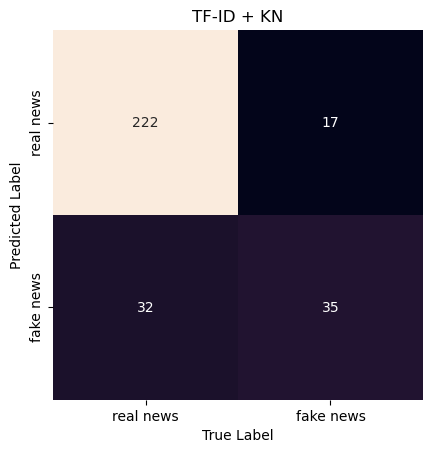

In [175]:
#draw confusion matrix
draw_conf_matrix(tfid_y_test, tfid_KN_pred, [1, 0], ["real news", "fake news"], "TF-ID + KN")

The ROC curve of this model for 5 folds will now be plotted.

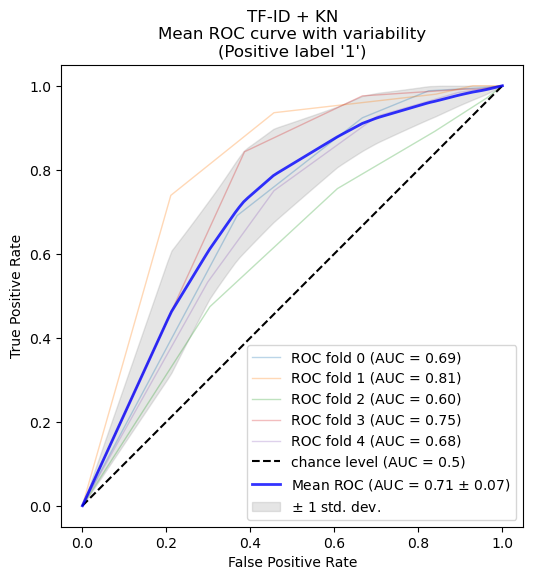

In [186]:
#plot ROC curve
plot_ROC_cross_val(tfid_X, tfid_y, tfid_KN_model, "TF-ID + KN")

Now, cross validation will be carried out.

In [152]:
#cross validation with needed results displayed
tfid_KN_cv_scores = k_fold_cross_val(tfid_KN_model, tfid_X, tfid_y, 5, 10)
tfid_KN_cv_average = calculate_average_scores(tfid_KN_cv_scores)

Average accuracy: 0.8130322511518269
Average macro precision: 0.6897801834319285
Average macro recall: 0.6795628767799795
Average macro F1-score: 0.6836721594788464


The performance of the model will now be added to the comparison dataframe

In [155]:
model_metrics_comparison.loc[len(model_metrics_comparison)] = ["TF-ID + K Nearest Neighbours Classifier", tfid_KN_cv_average[0], tfid_KN_cv_average[1], tfid_KN_cv_average[2], tfid_KN_cv_average[3]]

Now, the model's AOC values are also added to the comparison dataframe.

In [209]:
model_metrics_comparison.loc[1, "aoc"] = 0.71 
model_metrics_comparison.loc[2, "aoc"] = 0.70
model_metrics_comparison.loc[3, "aoc"] = 0.82 
model_metrics_comparison.loc[4, "aoc"] = 0.76
model_metrics_comparison.loc[5, "aoc"] = 0.71 

In [210]:
model_metrics_comparison

,model name,accuracy,macro precision,macro recall,macro F1,aoc
0,prototype model V1,0.780818,0.598902,0.325590,0.347971,NaN
1,prototype model V2,0.803676,0.661274,0.623683,0.635462,0.71
2,TF-ID + MNB classifier,0.812575,0.694418,0.702044,0.697146,0.70
3,TF-ID + SGD classifier,0.818669,0.711129,0.747229,0.724909,0.82
4,TF-ID + Random Forest classifier,0.818403,0.821350,0.514795,0.479552,0.76
5,TF-ID + K Nearest Neighbours Classifier,0.813032,0.689780,0.679563,0.683672,0.71


As seen above, the best model was the TF-ID + SGD model.